# Alabama Test 

### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
%matplotlib inline

In [2]:
df = pd.read_csv('Alabama_test.csv')
pd.set_option('display.max_columns', 110)

In [16]:
df['HICOV'].value_counts()

1    34399
0     4103
Name: HICOV, dtype: int64

### Preprocessing

In [4]:
X = df.drop(columns=['HICOV'])
y = df['HICOV']

In [5]:
continuous_columns = ['AGEP','INTP_cat','OIP_cat','RETP_cat','SEMP_cat','SSIP_cat','JWAP_mins','JWDP_mins','TOTAL_commute','JWMNP','PAP','SSP','WAGP','WKHP','OCCP','PERNP','PINCP',
                     'FINCP','HINCP','MAR_YEARS','NP']
categorical_columns = [x for x in X.columns if x not in continuous_columns]

### Categorical Features

In [6]:
with open('ohe_final.pickle', 'rb') as file:
    ohe_final = pickle.load(file)

In [7]:
_X_final_ohe = ohe_final.transform(X[categorical_columns]).toarray()
_X_final_ohe_df = pd.DataFrame(data = _X_final_ohe,
                        columns = ohe_final.get_feature_names(categorical_columns))

### Continuous Features

In [8]:
with open('scaler_final.pickle', 'rb') as file:
    scaler_final = pickle.load(file)

In [9]:
_X_final_cont = scaler_final.transform(X[continuous_columns])
_X_final_cont_df = pd.DataFrame(data = _X_final_cont,
                         columns = continuous_columns)

### Merge Continuous Features with Categorical

In [17]:
_X_final_merged = _X_final_cont_df[continuous_columns].merge(_X_final_ohe_df, left_index=True, right_index=True)
_X_final_merged.shape

(38502, 468)

### Load the NYS fitted model and predict

In [11]:
with open('logreg_classifier.pickle', 'rb') as file:
    logreg_clf = pickle.load(file)

In [14]:
y_final_pred = logreg_clf.predict(_X_final_merged)


print('Training Precision: ', precision_score(y, y_final_pred))
print('\n\n')
print('Training F1-Score: ', f1_score(y, y_final_pred))


Training Precision:  0.9663883236264121



Training F1-Score:  0.8757889381726841


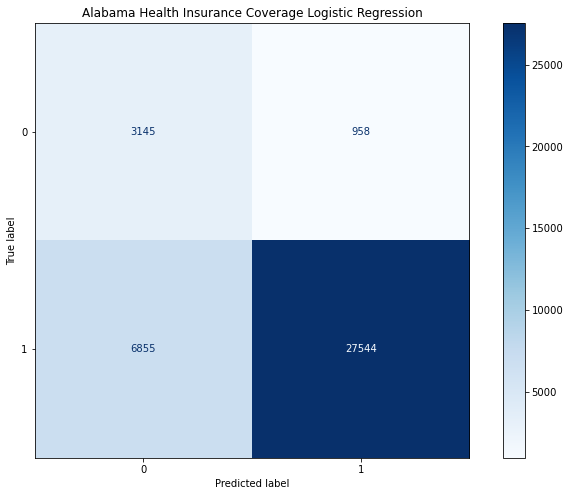

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(logreg_clf, _X_final_merged, y, cmap = 'Blues', values_format='d' , ax= ax)
ax.set_title('Alabama Health Insurance Coverage Logistic Regression')
fig.savefig('Albama_LogReg_Confusion_Matrix');